In [3]:
import geopandas as gpd # for geospatial data handling
import pandas as pd
import osmnx as ox # for handling data from OpenStreetMap (osm) with the help of networkX (nx)
import contextily as cx # for plotting
import matplotlib.pyplot as plt # for plotting
from pyproj import CRS # for more advanced CRS modifications and transformations
from shapely.geometry import Polygon
import numpy as np
import pandana 
import os
from tqdm import tqdm

In [4]:
#amenities_with_neighborhood.to_file("amenities_with_neighborhood.geojson", driver='GeoJSON')
amenities_with_neighborhood = gpd.read_file('/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/dataframes/amenities_with_neighborhood.geojson')

In [5]:
neighbourhoods = list(amenities_with_neighborhood['Arrondissement'].unique())[:-1]
neighbourhoods = [neighborhood + ', Montreal, Canada' for neighborhood in neighbourhoods]

In [6]:
place = 'Montreal, Canada'
type_of_transportation = 'walk'
tags = {'amenity': ['restaurant', 'cafe']}

walk_time = 15  # max walking horizon in minutes
walk_speed = 5  # km per hour
walk_time_sec = walk_time * 60 # We need the time in seconds to match how travel time is calculated in OSMnx

In [7]:
amenities = ox.features_from_place(place, tags=tags)
amenities = amenities.to_crs('EPSG:25832')
# Some amenities might be polygons, but we need them as points, so let's extract the centroids from the amenities' geometries
centroids = amenities.centroid

In [8]:
# RUN ONLY ONCE TO SAVE THE GRAPHS - ALREADY DONE

# graphs = {}

# # specify parameters for the analysis
# walk_time = 15  # max walking horizon in minutes
# walk_speed = 5  # km per hour
# walk_time_sec = walk_time * 60 # We need the time in seconds to match how travel time is calculated in OSMnx

# # Loop through the neighborhoods
# for neighborhood in tqdm(neighbourhoods):
#     # Create a graph for the current neighborhood
#     G_walk_neighborhood = ox.graph_from_place(neighborhood, network_type='walk') # type of transportation is set here

#     for u, v, data in G_walk_neighborhood.edges(data=True):
#         data['speed_kph'] = walk_speed
#     G_walk_neighborhood = ox.add_edge_travel_times(G_walk_neighborhood) # this computes the travel time in seconds based on the 'speed_kph' column

# # caro path
#     # ox.save_graphml(G_walk_neighborhood, f"/Users/caro/Desktop/SPRING24/GDS/PROJECT/graphs/G_walk_{neighborhood}.graphml") # save graph per neighbourhood
# # michel path
#     ox.save_graphml(G_walk_neighborhood, f"../graphs/G_walk_{neighborhood}.graphml") # save graph per neighbourhood
#     # Store the graph in the dictionary using the neighborhood name as the key
#     graphs[neighborhood] = G_walk_neighborhood

In [9]:
graphs = {}
graphs_dir = '/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/graphs'

for file_name in os.listdir(graphs_dir):
    if file_name.endswith(".graphml"):
        neighborhood = file_name.replace("G_walk_", "").replace(".graphml", "")
        file_path = os.path.join(graphs_dir, file_name)
        G_walk_neighborhood = ox.load_graphml(file_path)

        graphs[neighborhood] = G_walk_neighborhood


In [10]:
pandanas = {}

if pandanas == {}:
    # Build Pandana network for each neighborhood
    for neighborhood, graph in tqdm(graphs.items()):
        graph = ox.project_graph(graph, to_crs='EPSG:25832')
        nodes = ox.graph_to_gdfs(graph, edges=False)[['x', 'y']]
        edges = ox.graph_to_gdfs(graph, nodes=False).reset_index()[['u', 'v', 'travel_time']]

        network = pandana.Network(node_x=nodes['x'],
                                node_y=nodes['y'], 
                                edge_from=edges['u'],
                                edge_to=edges['v'],
                                edge_weights=edges[['travel_time']])
        
        pandanas[neighborhood] = network

  6%|▌         | 1/18 [00:06<01:53,  6.65s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 9639
Setting CH edge vector of size 30838
Range graph removed 31100 edges of 61676
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 11%|█         | 2/18 [00:15<02:09,  8.08s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 14281
Setting CH edge vector of size 46136
Range graph removed 46506 edges of 92272
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 17%|█▋        | 3/18 [00:27<02:25,  9.70s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 14970
Setting CH edge vector of size 48624
Range graph removed 48876 edges of 97248
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 22%|██▏       | 4/18 [00:28<01:29,  6.40s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 2588
Setting CH edge vector of size 8290
Range graph removed 8386 edges of 16580
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 28%|██▊       | 5/18 [00:34<01:21,  6.26s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 9720
Setting CH edge vector of size 31244
Range graph removed 31622 edges of 62488
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 33%|███▎      | 6/18 [00:42<01:21,  6.81s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 12319
Setting CH edge vector of size 38440
Range graph removed 38976 edges of 76880
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 39%|███▉      | 7/18 [00:45<00:59,  5.39s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3382
Setting CH edge vector of size 10774
Range graph removed 10912 edges of 21548
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 44%|████▍     | 8/18 [00:47<00:43,  4.39s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3200
Setting CH edge vector of size 9782
Range graph removed 9918 edges of 19564
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 50%|█████     | 9/18 [00:48<00:31,  3.53s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3603
Setting CH edge vector of size 11218
Range graph removed 11360 edges of 22436
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 56%|█████▌    | 10/18 [00:51<00:25,  3.16s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3795
Setting CH edge vector of size 11622
Range graph removed 11734 edges of 23244
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 61%|██████    | 11/18 [00:59<00:32,  4.67s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 10411
Setting CH edge vector of size 33610
Range graph removed 33746 edges of 67220
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 67%|██████▋   | 12/18 [01:08<00:37,  6.17s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 8890
Setting CH edge vector of size 29956
Range graph removed 30224 edges of 59912
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 72%|███████▏  | 13/18 [01:10<00:24,  4.88s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 1552
Setting CH edge vector of size 4430
Range graph removed 4700 edges of 8860
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 78%|███████▊  | 14/18 [01:19<00:24,  6.11s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 13822
Setting CH edge vector of size 43760
Range graph removed 44322 edges of 87520
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 83%|████████▎ | 15/18 [01:21<00:14,  4.85s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 3761
Setting CH edge vector of size 11500
Range graph removed 11874 edges of 23000
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

 89%|████████▉ | 16/18 [01:37<00:16,  8.00s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 16731
Setting CH edge vector of size 55202
Range graph removed 55584 edges of 110404
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


 94%|█████████▍| 17/18 [01:38<00:06,  6.04s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 1441
Setting CH edge vector of size 4694
Range graph removed 4774 edges of 9388
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%
 100% 

100%|██████████| 18/18 [01:45<00:00,  5.87s/it]

Generating contraction hierarchies with 4 threads.
Setting CH node vector of size 6417
Setting CH edge vector of size 20386
Range graph removed 20608 edges of 40772
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [11]:
walking_distances = {}  # Dictionary to store walking distances

if walking_distances == {}:
    for neighborhood, pandana in tqdm(pandanas.items()):
        pandana.set_pois(category='restaurant', # amenity set here
                        maxdist=walk_time_sec,
                        maxitems=3,
                        x_col=centroids.x, 
                        y_col=centroids.y)
        
        distances = pandana.nearest_pois(distance=walk_time_sec,
                                        category='restaurant', # amenity set here
                                        num_pois=3)
        
        distances['travel_time'] = distances[1] / 60
        walking_distances[neighborhood] = distances

  0%|          | 0/18 [00:00<?, ?it/s]/Users/caro/Library/Python/3.10/lib/python/site-packages/pandana/network.py:753: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
/Users/caro/Library/Python/3.10/lib/python/site-packages/pandana/network.py:761: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxdist, type(pd.Series())):
  6%|▌         | 1/18 [00:00<00:04,  3.46it/s]/Users/caro/Library/Python/3.10/lib/python/site-packages/pandana/network.py:753: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  elif isinstance(maxitems, type(pd.Series())):
/Users/caro/Library/Python/3.10/lib/python/site

In [12]:
distances_anjou = walking_distances["Anjou, Montreal, Canada"]
sorted_anjou_distances = distances_anjou.sort_values(by='travel_time')
#sorted_anjou_distances.to_csv('/Users/caro/Desktop/SPRING24/GDS/PROJECT/GDS_project/distances/walking/walking_distances_restaurant_anjou.csv', 
                                # index=False)

sorted_anjou_distances

,1,2,3,travel_time
osmid,,,,
4305375676,0.0,33.599998,435.799988,0.0
8893414113,0.0,0.000000,256.399994,0.0
2934341938,0.0,54.000000,81.400002,0.0
8928752655,0.0,166.000000,166.000000,0.0
2934341876,0.0,54.000000,56.000000,0.0
...,...,...,...,...
596643185,900.0,900.000000,900.000000,15.0
596643165,900.0,900.000000,900.000000,15.0
596643158,900.0,900.000000,900.000000,15.0


In [13]:
G_walk_anjou = graphs['Anjou, Montreal, Canada'] # access one graph
pandana_anjou = pandanas['Anjou, Montreal, Canada'] # access one pandana network
distances_anjou = walking_distances['Anjou, Montreal, Canada']

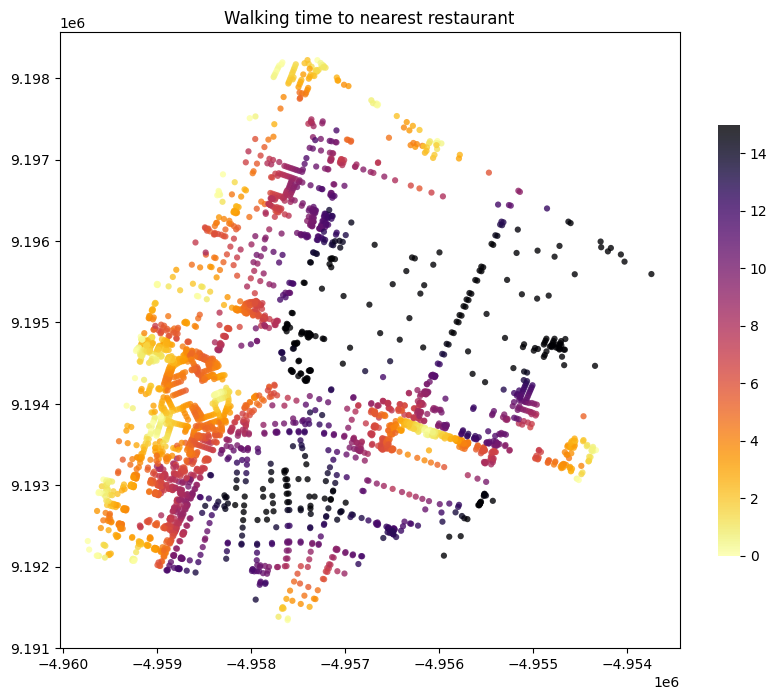

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot distance to nearest amenity from each node
# ox.plot_graph(G_walk_anjou, ax=ax, node_size=0, edge_linewidth=0.1,
#                         edge_color='gray', show=False, close=False)

nodes_anjou = pandana_anjou.nodes_df[['x', 'y']]

sc = ax.scatter(x=nodes_anjou['x'],
                y=nodes_anjou['y'], 
                c=distances_anjou['travel_time'], # column to plot (distance to nearest store)
                s=20, # size
                cmap='inferno_r',
                edgecolors='none',
                alpha=0.8)

ax.set_title('Walking time to nearest restaurant')
plt.colorbar(sc, shrink=0.7).outline.set_edgecolor('none')

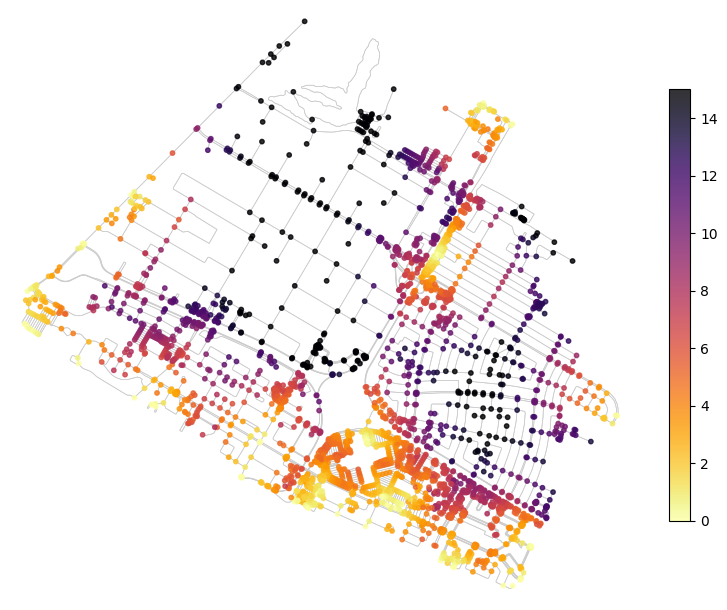

In [17]:
# this graph also has the right celestial projection (north on top)

G = ox.graph_from_place('Anjou, Montreal, Canada', network_type='walk')

# Project the graph to an appropriate CRS
G_proj = ox.project_graph(G)

# Plot the graph with a light background
fig, ax = ox.plot_graph(G_proj, figsize=(10, 8), bgcolor='white', edge_color='#CCCCCC', edge_linewidth=0.5, node_size=0, show=False, close=False)

# Assuming 'nodes_anjou' is a DataFrame containing node positions and 'distances_anjou' contains the data to plot
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)

# Scatter plot on the same Axes instance
sc = ax.scatter(x=nodes_proj['x'], y=nodes_proj['y'], c=distances_anjou['travel_time'], s=10, cmap='inferno_r', alpha=0.8)

# Add colorbar
plt.colorbar(sc, ax=ax, shrink=0.7)

# Show the plot
plt.show()